In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import cv2
import numpy as np

In [23]:
from utils import *

In [4]:
def match_and_score(real_img, cad_img):
    sift = cv2.SIFT_create()
    kp1, des1 = sift.detectAndCompute(real_img, None)
    kp2, des2 = sift.detectAndCompute(cad_img, None)

    bf = cv2.BFMatcher()
    matches = bf.knnMatch(des1, des2, k=2)

    # Lowe's Ratio Test
    ratio = 0.75
    good_matches = [m for m,n in matches if m.distance < ratio*n.distance]

    score = len(good_matches) / (len(kp1) + 1e-6)

    return score, kp1, kp2, good_matches

In [5]:
real_img = cv2.imread('images/real/1.jpeg')
cad_images = [cv2.imread(f"images/cad/{i}.png") for i in range(1, 6)]

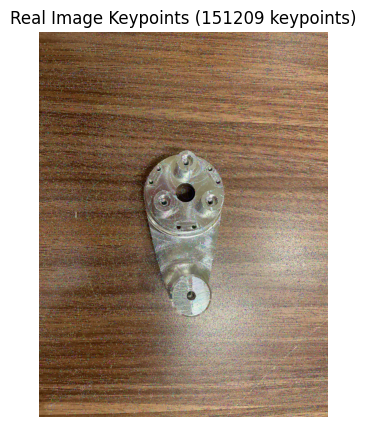

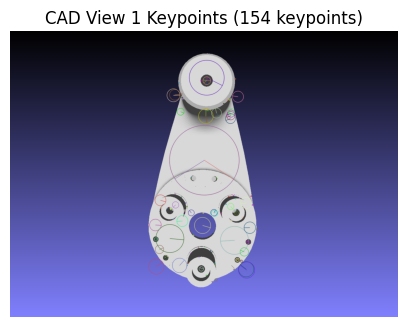

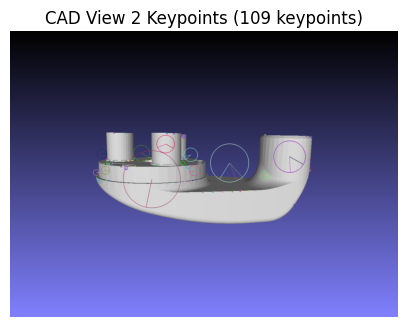

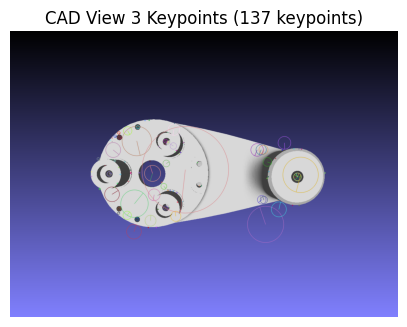

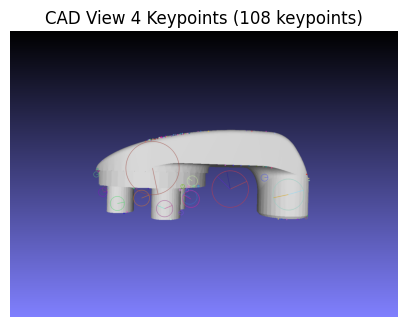

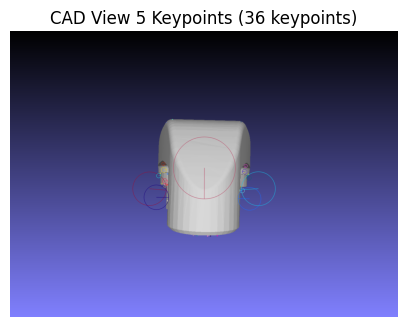

In [24]:
visualize_keypoints(real_img, "Real Image Keypoints")
for i, cad_img in enumerate(cad_images):
    visualize_keypoints(cad_img, f"CAD View {i+1} Keypoints")

In [6]:
scores = []
for cad_img in cad_images:
    score, _, _, _ = match_and_score(real_img, cad_img)
    scores.append(score)

best_idx = np.argmax(scores)

In [10]:
best_idx

np.int64(4)

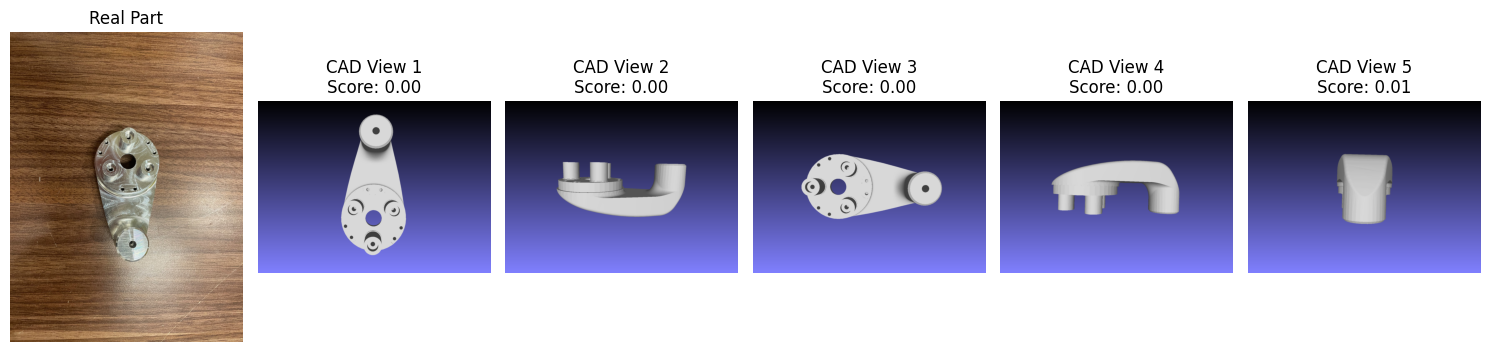

In [22]:
visualize_real_with_cad(real_img, cad_images, scores, best_idx)